In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('merge_data/data/merged_stroke_rucca.csv')

In [42]:
def convert_to_flt(x):
    try:
        return float(x)
    except:
        return x

In [41]:
data_subset = data[['Year', 'RUCC_2013', 'Crude Rate', 'Description']]

In [48]:
data_subset = data_subset.loc[data_subset['Crude Rate'] != "Unreliable"]

In [49]:
data_subset['Crude Rate'] = data_subset['Crude Rate'].map(lambda x: convert_to_flt(x))

/var/folders/rr/4m_9jch12418dy759l7hm_tc0000gn/T/ipykernel_2714/3718425641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Crude Rate'] = data_subset['Crude Rate'].map(lambda x: convert_to_flt(x))


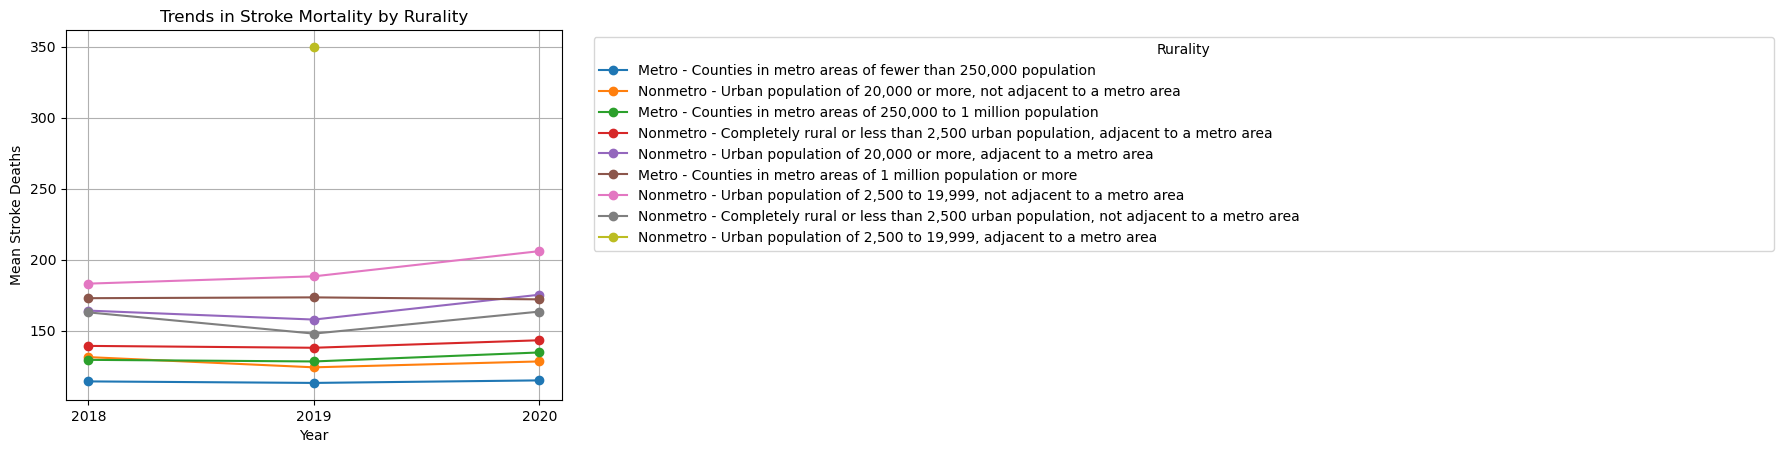

In [51]:
# Plotting trends for all ruralities
grouped_data = data_subset.dropna().groupby(['Year', 'RUCC_2013']).mean('Crude Rate').unstack()

# Plotting the trends
grouped_data.plot(kind='line', marker='o')
plt.title('Trends in Stroke Mortality by Rurality')
plt.xlabel('Year')
plt.xticks([2018, 2019, 2020])
plt.ylabel('Mean Stroke Deaths')

legend_labels = set(list(data_subset['Description']))

plt.legend(legend_labels, title='Rurality',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()